In [137]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print ("Loaded Libraries")

Loaded Libraries


In [6]:
dflog = pd.read_excel('heart.xlsx')

In [8]:
dflog.head()

,age_yr,sex_M_F,chest_pain_value,resting_BP_mm_Hg,cholesterol_mg_dl,fasting_blood_sugar_high,ECG_value,max_HR,exercise_angina,ST_depresssion_exercise,ST_slope_peak,number_vessels_involved,defect_diag,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
plt.rcParams['figure.figsize']= (3,3)
plt.style.use('seaborn-pastel')
plt.rcParams['figure.dpi']=150
c0 = sns.color_palette()[0]
c1 = sns.color_palette()[1]
c2 = sns.color_palette()[2]
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

/var/folders/mv/x5cd5k9s4xldty5dbz4rgl0c0000gn/T/ipykernel_85326/1799481649.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


In [17]:
def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh = True, colorscale = cmap_light, cdiscrete =cmap_bold, alpha= 0.1, psize = 10, zfunc = False, predicted = False):
    try:
        feature_names = Xtr.columns
    except:
        feature_names = None
    Xtrain = np.array(Xtr)
    Xtest = np.array(Xte)
    h = 0.2
    X = np.concatenate((Xtrain, Xtest))
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    if zfunc:
        mesh_data = np.c_[xx.ravel(), yy.ravel()]
        if feature_names is not None:
            mesh_data = pd.DataFrame(mesh_data, columns = feature_names)
        p0 = clf.predict_proba(mesh_data)[:, 0]
        p1 = clf.predict_proba(mesh_data)[:, 1]
        Z = zfunc(p0, p1)
    else:
        mesh_data = np.c_[xx.ravel(), yy.ravel()]
        if feature_names is not None:
            mesh_data = pd.DataFrame(mesh_data, columns = feature_names)
        Z = clf.predict(mesh_data)
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap = cmap_light, alpha = alpha, axes = ax, shading = 'auto')
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtrain[:,0], Xtrain[:, 1], c = showtr -1, cmap= cmap_bold, s = psize, alpha = alpha, edgecolor = 'k')
    ax.scatter(Xtest[:, 0], Xtest[:, 1], c = showte - 1, cmap = cmap_bold, s = psize +10, alpha = alpha, marker = 's')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax, xx, yy

In [19]:
def points_plot_prob(ax, Xtr, Xte, ytr, yte, clf, colorscale = cmap_light, cdiscrete = cmap_bold, ccolor = cm, alpha= 0.1, psize = 10):
    try:
        feature_names = Xtr.columns
    except:
        feature_names = None
    Xtrain = np.array(Xtr)
    Xtest = np.array(Xte)
    ax, xx, yy = points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh = False, colorscale = colorscale, cdiscrete = cdiscrete, psize = psize, alpha = alpha, predicted = True)
    mesh_data = np.c_[xx.ravel(), yy.ravel()]
    if feature_names is not None:
        mesh_data = pd.DataFrame(mesh_data, columns = feature_names)
    Z = clf.predict_proba(mesh_data)[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap = ccolor, alpha = 0.2)
    cs2 = plt.contour(xx, yy, Z, cmap = ccolor, alpha = 0.6)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 12)
    plt.show()

In [22]:
dflog = pd.read_excel('heart.xlsx')
print('The data have ', dflog.shape[0], ' rows and ', dflog.shape[1], 'columns\n')
print ('column names: \ n')
print ('\n'.join(list(dflog.columns)))

The data have  270  rows and  14 columns

column names: \ n
age_yr
sex_M_F
chest_pain_value
resting_BP_mm_Hg
cholesterol_mg_dl
fasting_blood_sugar_high
ECG_value
max_HR
exercise_angina
ST_depresssion_exercise
ST_slope_peak
number_vessels_involved
defect_diag
heart_disease


In [24]:
dflog.head()

,age_yr,sex_M_F,chest_pain_value,resting_BP_mm_Hg,cholesterol_mg_dl,fasting_blood_sugar_high,ECG_value,max_HR,exercise_angina,ST_depresssion_exercise,ST_slope_peak,number_vessels_involved,defect_diag,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


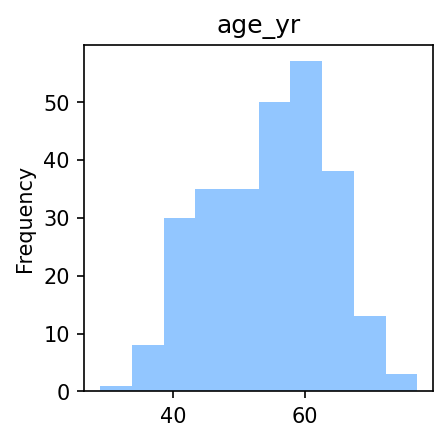

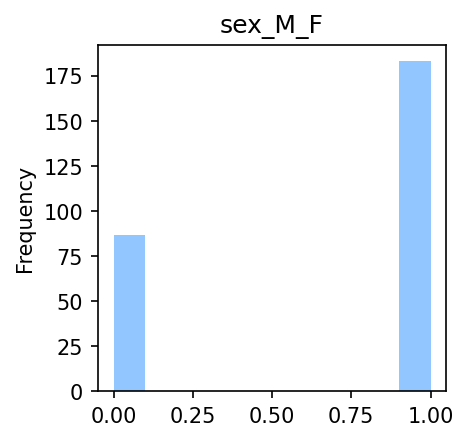

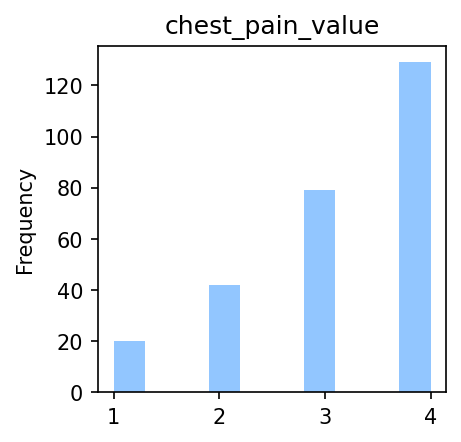

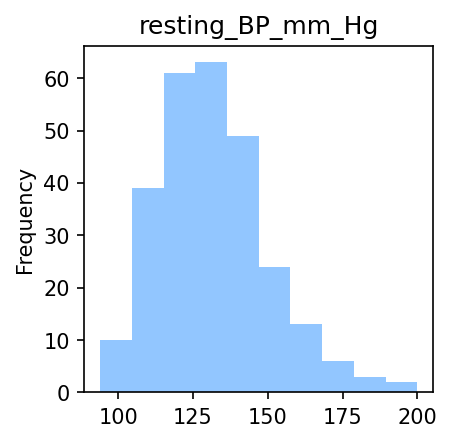

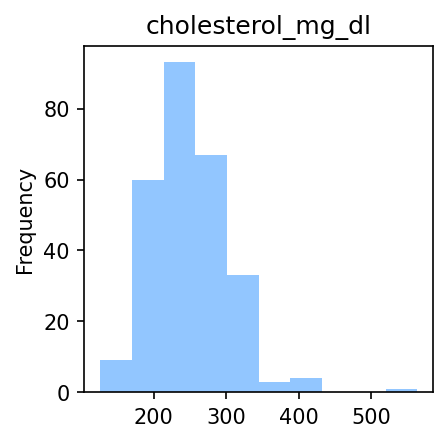

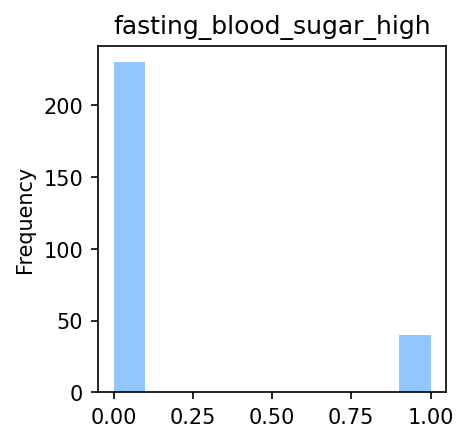

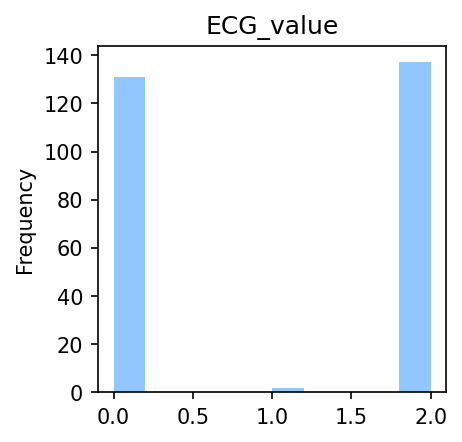

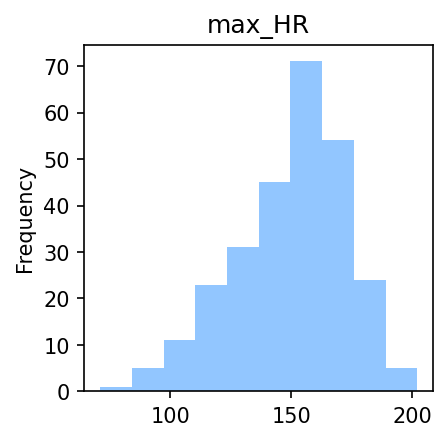

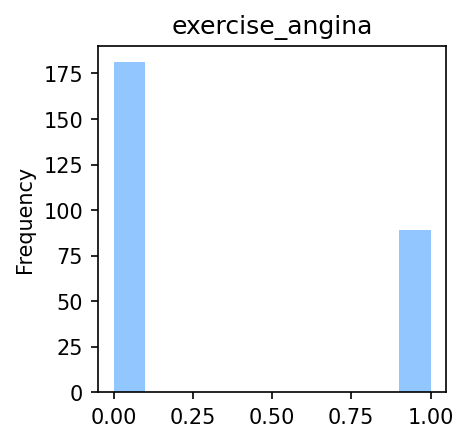

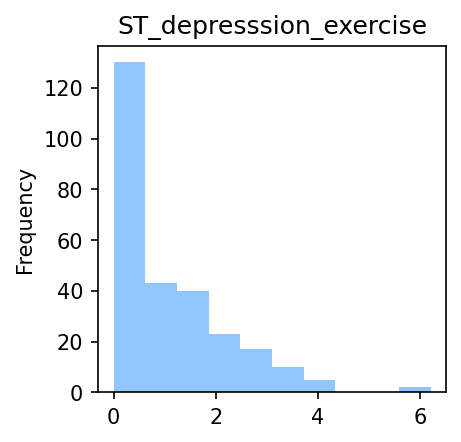

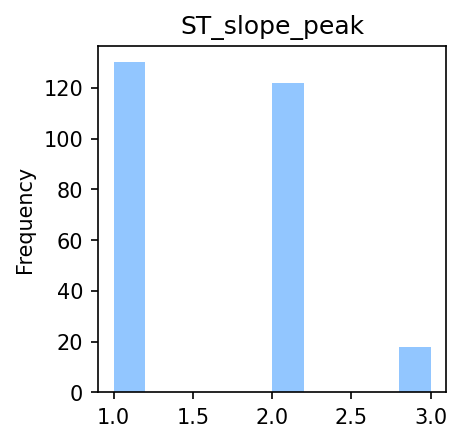

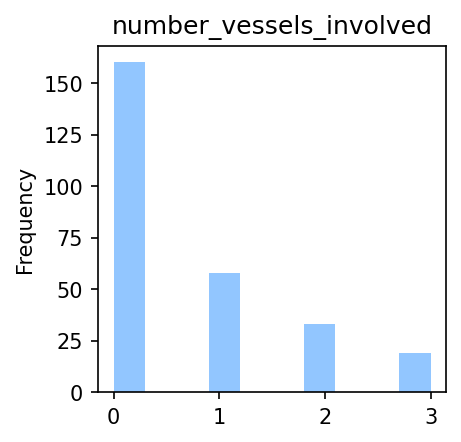

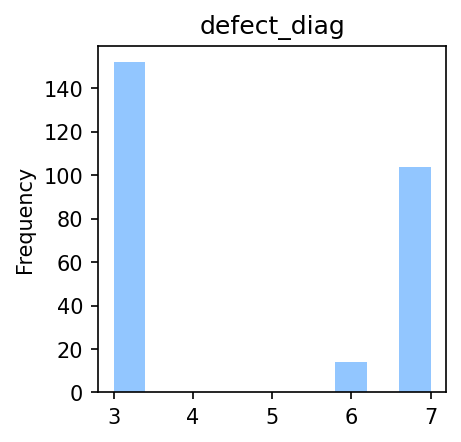

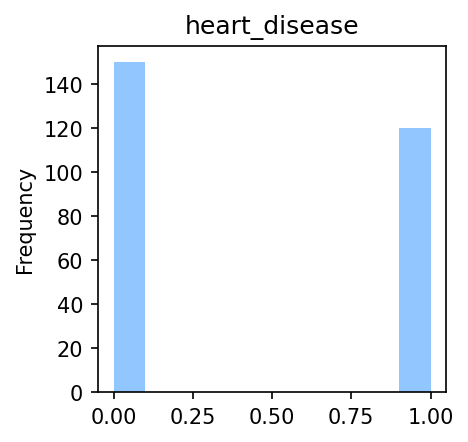

In [26]:
for col in list(dflog.columns):
    dflog[col].plot(kind = 'hist', title = col)
    plt.show()

In [28]:
x = dflog['age_yr']
print ('first 6 lines of age data:\n', x.head(6))
print ('\nsummary statistics of age:\n', x.describe())

first 6 lines of age data:
 0    70
1    67
2    57
3    64
4    74
5    65
Name: age_yr, dtype: int64

summary statistics of age:
 count    270.000000
mean      54.433333
std        9.109067
min       29.000000
25%       48.000000
50%       55.000000
75%       61.000000
max       77.000000
Name: age_yr, dtype: float64


In [30]:
y = dflog['resting_BP_mm_Hg']
print('first six lines of blood pressure data:\n', y.head(6))
print('\nsummary statistics of blood pressure:\n', y.describe())

first six lines of blood pressure data:
 0    130
1    115
2    124
3    128
4    120
5    120
Name: resting_BP_mm_Hg, dtype: int64

summary statistics of blood pressure:
 count    270.000000
mean     131.344444
std       17.861608
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: resting_BP_mm_Hg, dtype: float64


In [38]:
categorical_features = ['sex_M_F', 'chest_pain_value', 'ECG_value', 'ST_slope_peak', 'defect_diag']
dflog = pd.get_dummies(dflog, columns = categorical_features)

KeyError: "None of [Index(['sex_M_F', 'chest_pain_value', 'ECG_value', 'ST_slope_peak',\n       'defect_diag'],\n      dtype='object')] are in the [columns]"

In [40]:
print('The data have ', dflog.shape[0], ' rows and ', dflog.shape[1], ' columns\n')
print('column names: \n')
print('\n'.join(list(dflog.columns)))

The data have  270  rows and  24  columns

column names: 

age_yr
resting_BP_mm_Hg
cholesterol_mg_dl
fasting_blood_sugar_high
max_HR
exercise_angina
ST_depresssion_exercise
number_vessels_involved
heart_disease
sex_M_F_0
sex_M_F_1
chest_pain_value_1
chest_pain_value_2
chest_pain_value_3
chest_pain_value_4
ECG_value_0
ECG_value_1
ECG_value_2
ST_slope_peak_1
ST_slope_peak_2
ST_slope_peak_3
defect_diag_3
defect_diag_6
defect_diag_7


In [42]:
class_counts = dflog['heart_disease'].value_counts()
class_counts

0    150
1    120
Name: heart_disease, dtype: int64

In [44]:
type(class_counts)

pandas.core.series.Series

In [46]:
class_percentages = pd.Series([(x/dflog.shape[0]) * 100 for x in class_counts])
class_percentages

0    55.555556
1    44.444444
dtype: float64

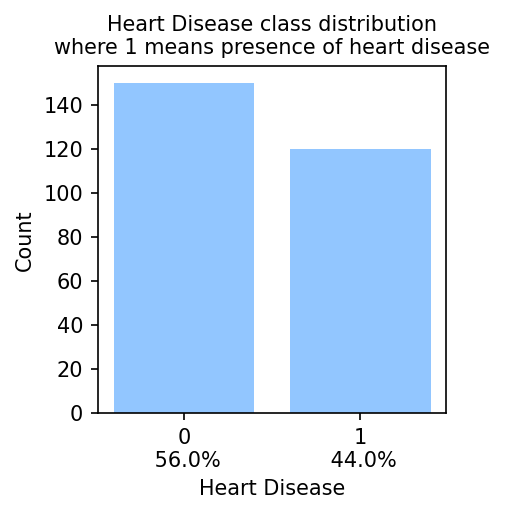

In [48]:
fig, ax = plt.subplots()
ax.bar(class_counts.index, class_counts)
ax.set_xticks([0, 1])
ax.set_xticklabels(class_percentages.index.astype(str) + '\n' + ' ' + class_percentages.round(0).astype(str) + '%')
ax.set_ylabel('Count')
ax.set_xlabel('Heart Disease')
ax.set_title('Heart Disease class distribution\nwhere 1 means presence of heart disease', fontsize = 10)
plt.show()

In [64]:
Xtrain, Xtest, ytrain, ytest = train_test_split(dflog[['cholesterol_mg_dl', 'resting_BP_mm_Hg']], dflog['heart_disease'], train_size = 0.80, random_state = 42)

In [65]:
classifier = LogisticRegression(solver = 'liblinear', max_iter = 500, C = 1000)

In [66]:
classifier.fit(Xtrain, ytrain)

LogisticRegression(C=1000, max_iter=500, solver='liblinear')

In [67]:
print(f'Accuracy on training data: {accuracy_score(classifier.predict(Xtrain), ytrain):.2f}')

Accuracy on training data: 0.61


In [68]:
print(f'Accuracy on test data: {accuracy_score(classifier.predict(Xtest), ytest):.2f}')

Accuracy on test data: 0.59


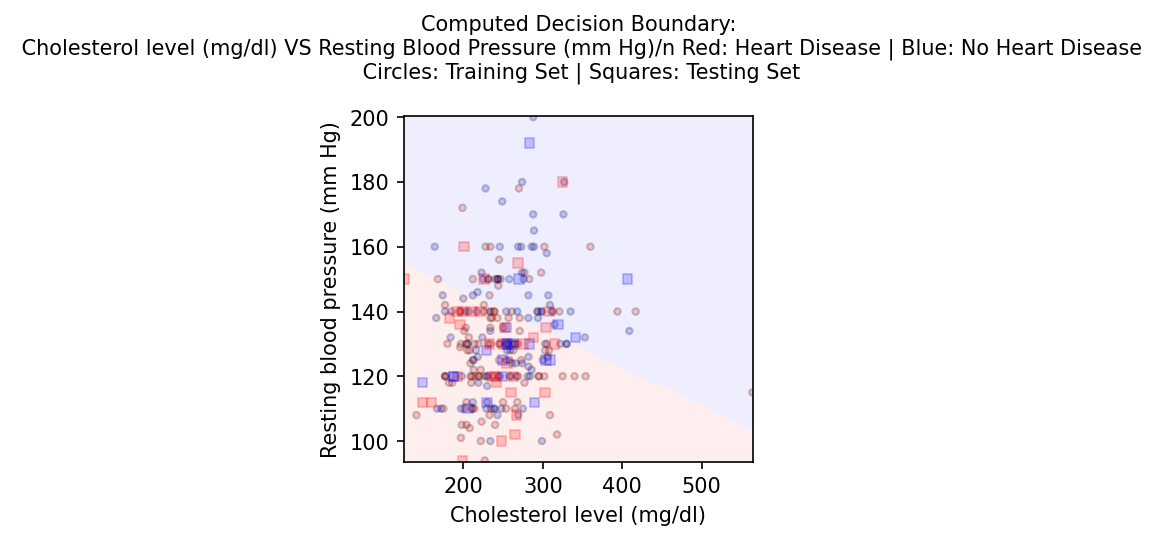

In [70]:
plt.figure()
ax = plt.gca()
ax.set_ylabel('Resting blood pressure (mm Hg)')
ax.set_xlabel('Cholesterol level (mg/dl)')
ax.set_title('Computed Decision Boundary:\n ' + 'Cholesterol level (mg/dl) VS Resting Blood Pressure (mm Hg)' + '/n Red: Heart Disease | Blue: No Heart Disease' + '\n Circles: Training Set | Squares: Testing Set\n', fontsize = 10)
_ = points_plot(ax, Xtrain, Xtest, ytrain, ytest, classifier, alpha = 0.2)

In [73]:
print("Classification Report for Training Data")
print(classification_report(ytrain, classifier.predict(Xtrain)))

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.61      0.78      0.68       117
           1       0.61      0.40      0.48        99

    accuracy                           0.61       216
   macro avg       0.61      0.59      0.58       216
weighted avg       0.61      0.61      0.59       216



In [75]:
print("classification report for test data")
print(classification_report(ytest, classifier.predict(Xtest)))

classification report for test data
              precision    recall  f1-score   support

           0       0.63      0.82      0.71        33
           1       0.45      0.24      0.31        21

    accuracy                           0.59        54
   macro avg       0.54      0.53      0.51        54
weighted avg       0.56      0.59      0.56        54



In [78]:
X = dflog.drop(columns = ['heart_disease'])
print('X: ', type(X), X.shape)

X:  <class 'pandas.core.frame.DataFrame'> (270, 23)


In [80]:
y = dflog['heart_disease']
print('y: ', type(y), y.shape)

y:  <class 'pandas.core.series.Series'> (270,)


In [82]:
list(X.columns)

['age_yr',
 'resting_BP_mm_Hg',
 'cholesterol_mg_dl',
 'fasting_blood_sugar_high',
 'max_HR',
 'exercise_angina',
 'ST_depresssion_exercise',
 'number_vessels_involved',
 'sex_M_F_0',
 'sex_M_F_1',
 'chest_pain_value_1',
 'chest_pain_value_2',
 'chest_pain_value_3',
 'chest_pain_value_4',
 'ECG_value_0',
 'ECG_value_1',
 'ECG_value_2',
 'ST_slope_peak_1',
 'ST_slope_peak_2',
 'ST_slope_peak_3',
 'defect_diag_3',
 'defect_diag_6',
 'defect_diag_7']

In [84]:
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, random_state = 2)
print('Training split has ', Xlr.shape[0], 'rows\n', 'and the corresponding labels have an equal number of values.', '(' + str(len(ylr))+ ')')
print ('Test split has ', Xtestlr.shape[0], 'rows\n', 'and the corresponding labels have an equal number of values.', '(' + str(len(ytestlr))+ ')')

Training split has  202 rows
 and the corresponding labels have an equal number of values. (202)
Test split has  68 rows
 and the corresponding labels have an equal number of values. (68)


In [88]:
def plot_y_ratios(y, ytest):
    fig, ax = plt.subplots(2, sharex = True)
    ax[0].bar(x = [0, 1], height = [y[y==0].count(), y[y==1].count()])
    ax[0].set_ylabel('train', fontsize = 8)
    ax[0].set_ylim(0, 125)
    ax[1].bar(x = [0, 1], height = [ytest[ytest==0].count(), ytest[ytest==1].count()])
    ax[1].set_ylabel('test', fontsize = 8)
    ax[1].set_ylim(0, 125)
    ax[1].set_xticks([0,1])
    ax[0].tick_params(which = 'both', labelsize = 8)
    ax[1].tick_params(which = 'both', labelsize = 8)
    ax[1].set_xlabel('heart disease\n(0 = no disease)', fontsize = 8)
    ax[0].set_title('% heart diseases (where 1 means presence of heart diseases):\n' + 'train: ' + str(round(100 * (y[y==1].count()/y.shape[0]), 0)) + '\ntest: ' + str(round(100 * (ytest[ytest==1].count()/ytest.shape[0]), 0)), fontsize = 10)
    plt.show()

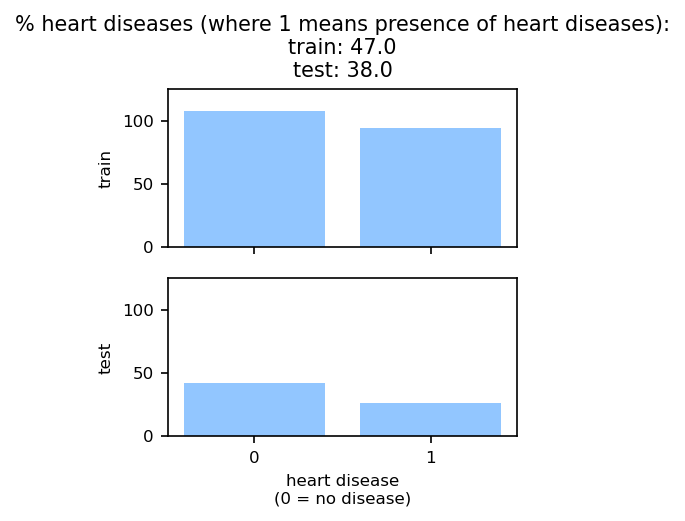

In [90]:
plot_y_ratios(ylr, ytestlr)

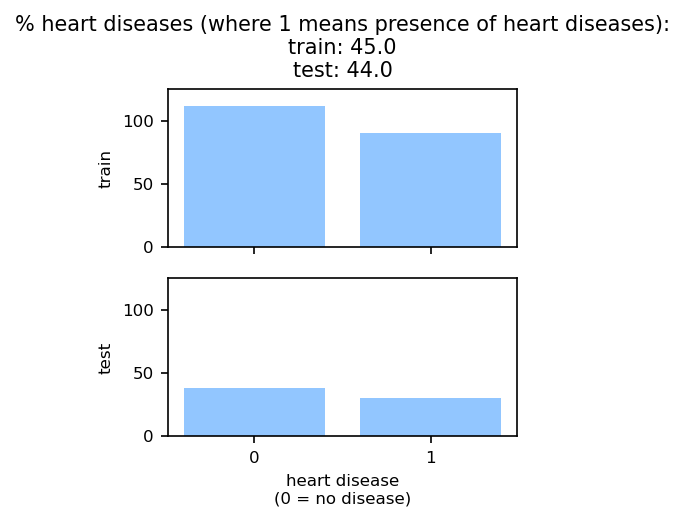

In [93]:
Xlrstrat, Xtestlrstrat, ylrstrat, ytestlrstrat = train_test_split(X, y, random_state = 2, stratify = y)
plot_y_ratios(ylrstrat, ytestlrstrat)

In [95]:
clf = LogisticRegression(solver = 'newton-cg', max_iter = 500)

In [97]:
clf.fit(Xlrstrat, ylrstrat)

LogisticRegression(max_iter=500, solver='newton-cg')

In [99]:
y_predict_test = clf.predict(Xtestlrstrat)
y_predict_training = clf.predict(Xlrstrat)

In [101]:
print ("[Test] Accuracy score (y_predict_test, ytestlrstrat):", f'{accuracy_score(y_predict_test, ytestlrstrat):.2f}')

[Test] Accuracy score (y_predict_test, ytestlrstrat): 0.81


In [103]:
print("[Training] Accuracy score: (ylrstrat, y_predict_training)", f'{accuracy_score(ylrstrat, y_predict_training):.2f}')

[Training] Accuracy score: (ylrstrat, y_predict_training) 0.89


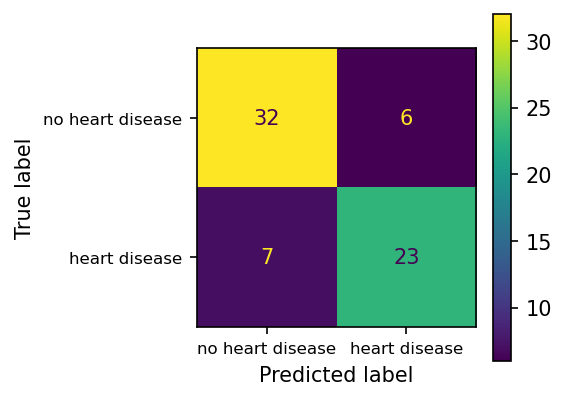

In [106]:
cm = confusion_matrix(ytestlrstrat, y_predict_test, labels = clf.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['no heart disease', 'heart disease'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no heart disease', 'heart disease'], fontsize = 8)
ax.set_yticklabels(labels = ['no heart disease', 'heart disease'], fontsize = 8)
display_cm.plot(ax = ax)

In [108]:
print(classification_report(ylrstrat, y_predict_training))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       112
           1       0.90      0.84      0.87        90

    accuracy                           0.89       202
   macro avg       0.89      0.89      0.89       202
weighted avg       0.89      0.89      0.89       202



In [112]:
print(classification_report(ytestlrstrat, y_predict_test))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        38
           1       0.79      0.77      0.78        30

    accuracy                           0.81        68
   macro avg       0.81      0.80      0.81        68
weighted avg       0.81      0.81      0.81        68



In [125]:
training_accuracy = []
test_accuracy = []
accuracy_difference = []
n_splits = 25
clf = LogisticRegression(solver = 'newton-cg', max_iter = 500)

In [126]:
for i in range (0, n_splits):
    Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, stratify = y, random_state = i)
    clf.fit(Xlr, ylr)
    y_predict_training = clf.predict(Xlr)
    y_predict_test = clf.predict(Xtestlr)
    tr_accuracy = accuracy_score(y_predict_training, ylr)
    training_accuracy.append(tr_accuracy)
    tst_accuracy = accuracy_score(y_predict_test, ytestlr)
    test_accuracy.append(tst_accuracy)
    accuracy_difference.append(tst_accuracy - tr_accuracy)

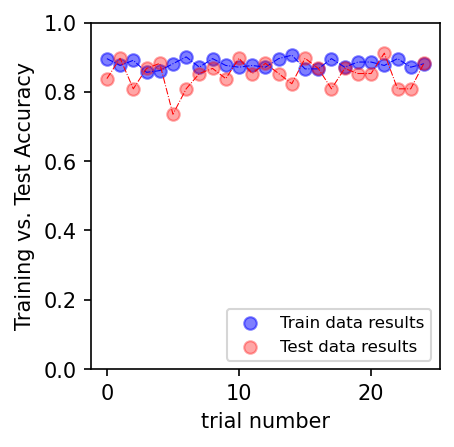

In [127]:
fig, ax = plt.subplots()
ax.scatter(range(len(training_accuracy)), training_accuracy, color = 'blue', alpha = 0.5, label = 'Train data results')
ax.plot(range(len(training_accuracy)), training_accuracy, color = 'blue', linestyle = '-.', linewidth = 0.5)
ax.scatter(range(len(test_accuracy)), test_accuracy, color = 'red', alpha = 0.35, label = 'Test data results')
ax.plot(range(len(test_accuracy)), test_accuracy, color = 'red', linestyle = '-.', linewidth = 0.5)
ax.legend(fontsize = 8, loc = 'lower right')
ax.set_ylabel('Training vs. Test Accuracy')
ax.set_ylim(0, 1)
ax.set_xlabel('trial number')
plt.show()

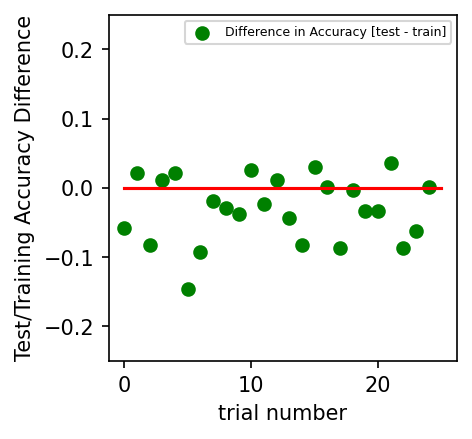

In [128]:
fig, ax = plt.subplots()
ax.scatter(range(len(accuracy_difference)), accuracy_difference, color = 'green', label = 'Difference in Accuracy [test - train]')
ax.plot([0, len(accuracy_difference)], [0, 0], 'red')
ax.legend(fontsize = 6)
ax.set_ylabel('Test/Training Accuracy Difference')
ax.set_ylim(-0.25, 0.25)
ax.set_xlabel('trial number')
plt.show()

In [129]:
print("[Training Classification Report]")
print(classification_report(ylr, y_predict_training))


[Training Classification Report]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       112
           1       0.88      0.84      0.86        90

    accuracy                           0.88       202
   macro avg       0.88      0.88      0.88       202
weighted avg       0.88      0.88      0.88       202



In [131]:
print("[Test Classification Report]")
print(classification_report(ytestlr, y_predict_test))

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        38
           1       0.92      0.80      0.86        30

    accuracy                           0.88        68
   macro avg       0.89      0.87      0.88        68
weighted avg       0.89      0.88      0.88        68



In [133]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [144]:
def cv_score(clf, x, y, score_func = accuracy_score):
    result = 0
    nfold = 5
    x.reset_index(drop = True, inplace = True)
    y.index = x.index
    for train, test in KFold(nfold, shuffle = True, random_state = 42).split(x):
        clf.fit(x.loc[train, :], y[train])
        result += score_func(clf.predict(x.loc[test, :]), y[test])
    return result / nfold

In [146]:
clf = LogisticRegression(solver = 'liblinear', max_iter = 500)
score = cv_score(clf, Xlr, ylr)
print(f'{score:.2f}')

0.83


In [148]:
Cs = [0.001, 0.1, 1, 10, 100]